<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/IRC005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install optbinning

Tutorial: optimal binning with binary target

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [ ]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
variable = "mean radius"
x = df[variable].values
y = data.target

这段代码使用了`optbinning`库，这是一个在机器学习预处理阶段用于最优离散化（或称为“分箱”）的Python库。最优离散化是一种将连续数值或序数变量转化为离散变量（即有限的几个类别或“箱”）的过程，这通常可以提高模型的性能，特别是在处理类别不平衡或存在异常值的问题时。下面是对这段代码的逐行解释：

```python
from optbinning import OptimalBinning
```
这行代码从`optbinning`模块导入了`OptimalBinning`类。`OptimalBinning`是执行最优离散化的主要工具。

```python
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")
```
这一行代码创建了`OptimalBinning`类的一个实例`optb`，用于对一个特定的变量进行离散化。参数说明如下：
- `name=variable`：指定将要被离散化的变量的名称。这里的`variable`应该是一个字符串，表示变量名。
- `dtype="numerical"`：指定变量类型。在这种情况下，`"numerical"`表示待离散化的变量是数值型的。`optbinning`库也支持处理序数变量，那时会用到`dtype="ordinal"`。
- `solver="cp"`：指定用于寻找最优分箱策略的求解器。这里使用的是`"cp"`，代表使用的是约束编程（Constraint Programming）求解器。`optbinning`库还支持其他类型的求解器，比如`"cma-es"`（一个基于进化计算的求解器）。

```python
optb.fit(x, y)
```
这行代码使用`fit`方法对`optb`实例进行拟合。`fit`方法执行最优离散化的计算过程。参数说明如下：
- `x`：这是离散化的输入，即需要进行分箱处理的数值型数据。`x`应该是一个一维数组或列表。
- `y`：这是目标变量，即模型的输出或响应变量。`OptimalBinning`会根据`y`的值来优化`x`的分箱策略，目的是提高模型的预测性能或解决其他统计问题。

总之，这段代码的作用是使用`optbinning`库对一个数值型变量`x`进行最优离散化处理，离散化的策略是根据目标变量`y`来优化的，目标是在保持或提升模型性能的同时，将连续的数值变量转化为几个离散的类别。

In [ ]:
from optbinning import OptimalBinning
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")
optb.fit(x, y)

(CVXPY) Nov 03 09:42:11 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Nov 03 09:42:11 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


OptimalBinning(name='mean radius')

In [ ]:
optb.status

'OPTIMAL'

In [ ]:
optb.splits

array([11.42500019, 12.32999992, 13.09499979, 13.70499992, 15.04500008,
       16.92500019])

In [ ]:
binning_table = optb.binning_table
type(binning_table)

binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 11.43)",118,0.207381,3,115,0.974576,-3.12517,0.962483,0.087205
1,"[11.43, 12.33)",79,0.138840,3,76,0.962025,-2.710972,0.538763,0.052198
2,"[12.33, 13.09)",68,0.119508,7,61,0.897059,-1.643814,0.226599,0.025513
3,"[13.09, 13.70)",49,0.086116,10,39,0.795918,-0.839827,0.052131,0.006331
4,"[13.70, 15.05)",83,0.145870,28,55,0.662651,-0.153979,0.003385,0.000423
5,"[15.05, 16.93)",54,0.094903,44,10,0.185185,2.002754,0.359566,0.038678
6,"[16.93, inf)",118,0.207381,117,1,0.008475,5.283323,2.900997,0.183436
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,569,1.000000,212,357,0.627417,,5.043925,0.393784


在`optbinning`库中，`binning_table`对象包含了分箱（Binning）过程的详细信息，包括每个分箱（bin）的边界、分箱后的统计信息等。`binning_table.plot(metric="some_metric")`方法用于绘制与分箱信息相关的各种统计图表，这可以帮助分析每个分箱的效果和特性。下面是关于使用`metric="woe"`和`metric="event_rate"`两种不同参数时这段代码的作用的详细解释：

### 1. `binning_table.plot(metric="woe")`

- **WOE（Weight of Evidence）**：WOE是对逻辑回归模型特别重要的一个统计量，它反映了独立变量对目标变量的影响力度。WOE通过比较每个分箱内事件发生与不发生的概率比值的对数，来衡量该分箱的“效力”。
    - **图表含义**：使用`metric="woe"`时，`plot`方法会绘制每个分箱对应的WOE值图表。在这个图表中，X轴表示不同的分箱（或分箱的边界），Y轴表示WOE值。
    - **解读**：通过观察WOE图表，我们可以理解不同分箱对目标变量的影响程度。WOE值越大或越小，表示该分箱对事件的发生有着更强的“推动”作用。

### 2. `binning_table.plot(metric="event_rate")`

- **Event Rate（事件率）**：事件率是指在每个分箱中，事件发生的频率或概率。事件率直接反映了每个分箱内目标变量（通常是二元变量，如贷款违约与否）的分布特性。
    - **图表含义**：使用`metric="event_rate"`时，`plot`方法绘制的是每个分箱内事件发生的比率图表。X轴为分箱，Y轴为事件发生的概率或频率。
    - **解读**：事件率图表有助于直观理解不同分箱内目标变量分布的差异，高事件率的分箱表示该区间内事件频繁发生，反之则表示事件较少发生。

### 注意事项

- **图表分析**：在使用这些图表进行数据分析或模型预处理时，选择最优的分箱策略不仅要考虑WOE或事件率，还要结合业务的理解、数据的分布特性以及模型最终的性能表现。
- **数据分布**：绘制的图表还可以帮助检查数据分布是否均匀，是否存在极端值或噪音，这可能需要在分箱前进行数据清洗或转换。

通过这两个图表，分析师和数据科学家可以更深入地理解数据特征，优化特征工程的过程，进而提升模型性能。

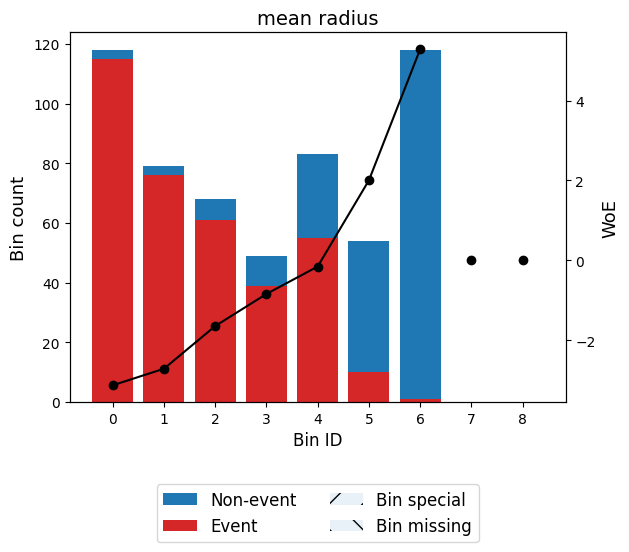

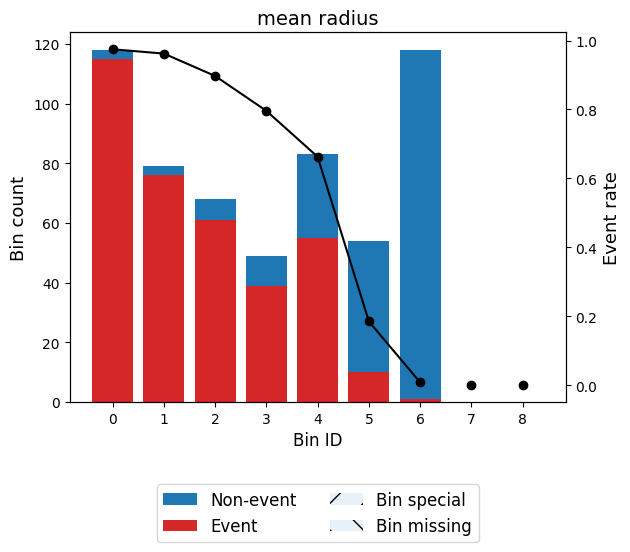

In [ ]:
binning_table.plot(metric="woe")
binning_table.plot(metric="event_rate")

这段代码展示了如何使用`OptimalBinning`对象`optb`（之前已经通过`.fit()`方法拟合了数据）来转换数据`x`，将其从原始的数值形式转换为每个分箱对应的权重证据（WOE，Weight of Evidence）值。之后，使用`pandas`的`Series.value_counts()`方法来统计转换后各个WOE值出现的频率。下面是详细的步骤和含义解释：

### 步骤1: 使用WOE进行数据转换

```python
x_transform_woe = optb.transform(x, metric="woe")
```

- `optb.transform(x, metric="woe")`：这里的`transform`方法应用了之前通过`.fit(x, y)`方法确定的最优分箱策略。`metric="woe"`指定了在转换过程中使用WOE值代替原始的数值。WOE值能够为逻辑回归等模型提供更好的解释性和效果，它反映了变量在不同分箱中对目标变量的影响力度。
- `x`：这是需要被转换的原始数值数据，它应该和之前`fit`方法中使用的一致。

### 步骤2: 统计WOE值出现的频率

```python
pd.Series(x_transform_woe).value_counts()
```

- `pd.Series(x_transform_woe)`：将转换后的WOE数组或列表转换成`pandas`的`Series`对象，便于后续进行数据处理和分析。
- `.value_counts()`：这个方法会统计`Series`中各个值出现的次数，非常适合用来分析转换后的WOE值的分布情况。对于每个WOE值，它会给出相应的频数，即每个WOE值在转换过程中被分配到的原始数据的数量。

### 解释和应用

- **WOE值分布**：输出结果提供了每个WOE值对应的频数，这可以帮助分析师理解每个分箱在数据中的重要性。如果某个WOE值出现的频数非常高，说明相应分箱包含了大量数据点。

- **模型解释**：在逻辑回归等模型中，WOE值能帮助解释各个特征对目标变量的影响程度。通过分析`.value_counts()`的结果，可以进一步理解数据中存在的模式或规律。

- **特征工程**：此步骤也是特征工程的一部分，通过转换特征，使其更适合用于建模。WOE转换不仅能帮助直接提高某些模型（如逻辑回归）的性能，还可以缓解极端值的影响，并增加对变量之间关系的解释性。

总的来说，这段代码是处理分类和预测建模问题时的一个标准步骤，特别是在处理金融、信贷评分、市场营销等领域的数据时，能够提升模型性能并提供业务洞察。

In [ ]:
x_transform_woe = optb.transform(x, metric="woe")
pd.Series(x_transform_woe).value_counts()

,count
5.283323,118
-3.125170,118
-0.153979,83
-2.710972,79
-1.643814,68
2.002754,54
-0.839827,49


In [ ]:
x_transform_event_rate = optb.transform(x, metric="event_rate")
pd.Series(x_transform_event_rate).value_counts()

,count
0.008475,118
0.974576,118
0.662651,83
0.962025,79
0.897059,68
0.185185,54
0.795918,49


In [ ]:
x_transform_indices = optb.transform(x, metric="indices")
pd.Series(x_transform_indices).value_counts()


,count
6,118
0,118
4,83
1,79
2,68
5,54
3,49


In [ ]:
x_transform_bins = optb.transform(x, metric="bins")
pd.Series(x_transform_bins).value_counts()

,count
"[16.93, inf)",118
"(-inf, 11.43)",118
"[13.70, 15.05)",83
"[11.43, 12.33)",79
"[12.33, 13.09)",68
"[15.05, 16.93)",54
"[13.09, 13.70)",49


In [ ]:
!wget https://media.githubusercontent.com/media/RaffelRavionaldo/Home-Credit-Indonesia-Score-Card/refs/heads/main/application_train.csv

--2024-11-03 09:42:13--  https://media.githubusercontent.com/media/RaffelRavionaldo/Home-Credit-Indonesia-Score-Card/refs/heads/main/application_train.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166133370 (158M) [text/plain]
Saving to: ‘application_train.csv.1’

application_train.c 100%[===================>] 158.44M   118MB/s    in 1.3s    

2024-11-03 09:42:17 (118 MB/s) - ‘application_train.csv.1’ saved [166133370/166133370]



In [ ]:
df_cat = pd.read_csv("application_train.csv", engine='c')

In [ ]:
df_cat.head(50)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.set_option('display.max_columns',None)
df_cat.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [ ]:
variable_cat = "NAME_INCOME_TYPE"
x_cat = df_cat[variable_cat].values
y_cat = df_cat.TARGET.values

df_cat[variable_cat].value_counts()

,count
NAME_INCOME_TYPE,
Working,158774
Commercial associate,71617
Pensioner,55362
State servant,21703
Unemployed,22
Student,18
Businessman,10
Maternity leave,5


In [ ]:
pd.set_option('display.max_rows',None)
# 查看每列的数据类型
print(df_cat.dtypes)


SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [ ]:

# 对类别型变量进行描述性统计
category_vars = df_cat.select_dtypes(include='O').columns
for var in category_vars:
    print(var, df_cat[var].nunique())  # 计算唯一值的数量

NAME_CONTRACT_TYPE 2
CODE_GENDER 3
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
NAME_TYPE_SUITE 7
NAME_INCOME_TYPE 8
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 6
NAME_HOUSING_TYPE 6
OCCUPATION_TYPE 18
WEEKDAY_APPR_PROCESS_START 7
ORGANIZATION_TYPE 58
FONDKAPREMONT_MODE 4
HOUSETYPE_MODE 3
WALLSMATERIAL_MODE 7
EMERGENCYSTATE_MODE 2


In [ ]:
for var in category_vars:
    print(var, df_cat[var].nunique())  # 计算唯一值的数量
    print(var, df_cat[var].value_counts())  # 计算每个类别的出现次数

NAME_CONTRACT_TYPE 2
NAME_CONTRACT_TYPE NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
CODE_GENDER 3
CODE_GENDER CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
FLAG_OWN_CAR 2
FLAG_OWN_CAR FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
FLAG_OWN_REALTY 2
FLAG_OWN_REALTY FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
NAME_TYPE_SUITE 7
NAME_TYPE_SUITE NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
NAME_INCOME_TYPE 8
NAME_INCOME_TYPE NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: c

In [ ]:
optb = OptimalBinning(name=variable_cat, dtype="categorical", solver="mip", cat_cutoff=0.1)

使用`optbinning`库的`OptimalBinning`类来处理一个分类（categorical）变量。这个过程包括指定变量的名称、数据类型以及使用的求解器类型，并对罕见分类进行合并的特定设置。以下是这个过程的详细解释和步骤：

### 1. 实例化 `OptimalBinning` 类

```python
from optbinning import OptimalBinning

optb = OptimalBinning(name='your_variable_name', dtype='categorical', solver='cp', cat_cutoff=0.1)
```

- `name='your_variable_name'`: 这里需要替换为你的变量实际的名称。这主要用于输出和解释目的，以便更好地理解正在处理和优化哪个特征。
- `dtype='categorical'`: 指明变量类型是分类的，`optbinning`将据此采用适合分类变量的处理和优化策略。
- `solver='cp'`: 选择‘cp’表示使用混合整数编程（Mixed-Integer Programming，MIP）求解器。MIP求解器适用于处理复杂的最优化问题，能有效地搜索最优的分箱策略。
- `cat_cutoff=0.1`: 这个参数用于设置分类变量的频数阈值。具体来说，所有频率低于10%的类别将被合并成一个“其他”类别。这在处理具有大量稀疏类别（即那些个别出现次数很少的类别）的分类变量时非常有用。

### 2. 拟合（Fit）`OptimalBinning` 实例

在实例化`OptimalBinning`对象后，你需要使用你的数据对其进行拟合。假设`x`是你的分类特征数据，`y`是目标变量。

```python
# x: 分类特征向量或数组
# y: 目标变量的向量或数组
optb.fit(x, y)
```

### 3. 转化（Transform）数据

拟合后，可以使用该实例来转换特征数据，将其转化为WOE值、事件率等。

```python
x_transformed = optb.transform(x, metric='woe')
```

### 4. 解释

通过设置`cat_cutoff=0.1`，你指定了将所有出现频率低于10%的独特类别合并为一个“其他”类别。在例子中，如“State servant”，“Unemployed”，“Student”，“Businessman”和“Maternity leave”这些类别，如果它们的出现频率均低于10%，那么它们会在进行最优分箱过程中被合并。

这样做的好处是可以减少最终模型的复杂性，降低出现过度拟合的风险，并且使得模型更易于解释。同时，通过使用`optbinning`的最优分箱技术，你能够确保即便是合并后的类别也能为预测目标变量提供有价值的信息。

In [ ]:
optb.fit(x_cat, y_cat)

OptimalBinning(cat_cutoff=0.1, dtype='categorical', name='NAME_INCOME_TYPE',
               solver='mip')

In [ ]:
optb.status

'OPTIMAL'

In [ ]:
optb.splits

[array(['Pensioner'], dtype=object),
 array(['Commercial associate'], dtype=object),
 array(['Working'], dtype=object),
 array(['State servant', 'Unemployed', 'Student', 'Businessman',
        'Maternity leave'], dtype=object)]

In [ ]:
binning_table = optb.binning_table
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[Pensioner],55362,0.180033,52380,2982,0.053864,0.433445,0.028249,0.003504
1,[Commercial associate],71617,0.232892,66257,5360,0.074843,0.082092,0.001516,0.000189
2,[Working],158774,0.516320,143550,15224,0.095885,-0.188675,0.019895,0.002483
3,"[State servant, Unemployed, Student, Businessm...",21758,0.070755,20499,1259,0.057864,0.357573,0.007795,0.000969
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,307511,1.000000,282686,24825,0.080729,,0.057455,0.007146


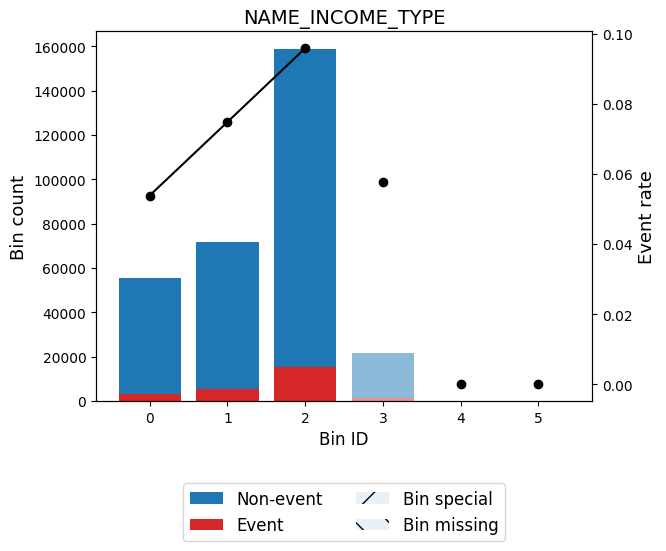

In [ ]:
binning_table.plot(metric="event_rate")

从版本0.17.1开始，`optbinning`库在处理训练期间未观察到的分类（unobserved categories）时引入了特定的规则，特别是在进行数据转换时，这些规则根据转换时使用的不同度量标准（metric）而变化。以下是针对不同转换度量标准时，`optbinning`如何处理未观察到的分类（categories）的详细说明：

### 1. 当转换度量标准（`transform metric`）为 `'woe'`（Weight of Evidence）时：

- **规则**：为未观察到的分类赋予的WOE值是其平均事件率（mean event rate）的WOE值，并将其设置为0。
- **解释**：这意味着如果在模型训练时遇到之前未见过的分类，`optbinning`会计算整体数据的平均事件率，然后根据这个平均事件率计算WOE，并将该WOE值设为0。这样的处理方式可以避免未见过的分类对模型预测产生不利影响。

### 2. 当转换度量标准（`transform metric`）为 `'event_rate'`（事件率）时：

- **规则**：未观察到的分类会被赋予整个数据集上的平均事件率。
- **解释**：在这种情况下，未观察到的分类在数据转换时会被替换为所有数据点的平均事件率，这样做旨在保持模型在遇到新分类时的稳健性。

### 3. 当转换度量标准（`transform metric`）为 `'indices'` 时：

- **规则**：未观察到的分类会被赋予值 `-1`。
- **解释**：这意味着如果在特征中遇到训练时未遇到的分类，这些分类会被标记为 `-1`。这种处理方式在需要明确区分已知和未知分类时非常有用。

### 4. 当转换度量标准（`transform metric`）为 `'bins'` 时：

- **规则**：未观察到的分类会被标记为 `'unknown'`。
- **解释**：在此情况下，`optbinning`将未观察到的分类替换为 `'unknown'` 标签，这有助于在处理文本数据或分类数据时，明确标识出训练期间未遇到的分类。

### 总结

`optbinning`库自0.17.1版本起为不同转换度量标准提供了明确、有区别的处理方式，以应对训练期间未观察到的分类。这样的设计使得`optbinning`更加灵活和强大，可以适应多种数据预处理和特征工程场景，特别是在处理具有大量分类变量的数据集时。通过这种方式，`optbinning`旨在提高模型性能，同时确保模型的稳定性和鲁棒性。

In [ ]:
x_new = ["Businessman", "Working", "New category"]
x_transform_woe = optb.transform(x_new, metric="woe")
print(pd.DataFrame({variable_cat: x_new, "WoE": x_transform_woe}))


x_transform_woe = optb.transform(x_new, metric="woe")
print(pd.DataFrame({variable_cat: x_new, "WoE": x_transform_woe}))


x_transform_bins = optb.transform(x_new, metric="bins")
print(pd.DataFrame({variable_cat: x_new, "Bin": x_transform_bins}))


x_transform_indices = optb.transform(x_new, metric="indices")
print(pd.DataFrame({variable_cat: x_new, "Index": x_transform_indices}))

  NAME_INCOME_TYPE       WoE
0      Businessman  0.357573
1          Working -0.188675
2     New category  0.000000
  NAME_INCOME_TYPE       WoE
0      Businessman  0.357573
1          Working -0.188675
2     New category  0.000000
  NAME_INCOME_TYPE                                                Bin
0      Businessman  ['State servant' 'Unemployed' 'Student' 'Busin...
1          Working                                        ['Working']
2     New category                                            unknown
  NAME_INCOME_TYPE  Index
0      Businessman      3
1          Working      2
2     New category     -1


`"New category"` 是在原始训练数据中没有出现过的新类别，那么在使用 `optb.transform()` 方法时，处理这个新类别会遵循 `optbinning` 库中对未观测类别的默认规则。根据之前的讨论，特别是对于分类（categorical）数据，`optbinning` 允许通过参数 `cat_unknown` 来控制未见过的类别的处理方式。不过，在没有特别指定 `cat_unknown` 的情况下，`optbinning` 会依据转换时使用的度量标准（metric）有不同的处理方式：

### 对于 WOE（Weight of Evidence）:

- 当遇到未见过的类别，`optbinning` 会为这些类别计算一个 WOE 值，这个 WOE 值是根据整个数据集的平均事件率（mean event rate）来计算的。如果未明确设定如何处理，理论上，未见过的类别的 WOE 值可能会以平均事件率的WOE值来表示，通常这会被设置为0，但实际行为还需参考库的具体实现。

### 对于事件率（event_rate）:

- 对于未见过的类别，它们会被赋予整个数据集的平均事件率。

### 对于 indices:

- 如果使用的度量标准是 `indices`，未见过的类别可能会被赋予一个特定的索引值如 `-1`，表示这是一个未知类别。

### 对于 bins:

- 在 `bins` 的情况下，未见过的类别可能会被明确标记为如 `'unknown'` 或其他指示未知类别的标签。

### 应用到 `"New category"`:

当你尝试转换包含 `"New category"` 这样的新类别的数据时：

```python
x_new = ["Businessman", "Working", "New category"]
x_transform_woe = optb.transform(x_new, metric="woe")
x_transform_bins = optb.transform(x_new, metric="bins")
x_transform_indices = optb.transform(x_new, metric="indices")
```

- 在 `x_transform_woe` 中，`"New category"` 可能会得到一个根据平均事件率计算的 WOE 值。
- 在 `x_transform_bins` 中，`"New category"` 可能会被归入一个 `'unknown'` 或其他表示未知的分类。
- 在 `x_transform_indices` 中，`"New category"` 可能会得到 `-1` 或类似的值，表明这是一个未识别的类别。

### 注意：

处理未知类别的确切行为可能会根据 `optbinning` 库的不同版本有所变化，建议查看最新的文档或库源代码来获取默认处理方式的详细信息。如果默认的处理方式不满足需求，考虑在调用 `OptimalBinning` 类的构造函数时显式指定 `cat_unknown` 参数来定制未见类别的处理。

In [ ]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="mip")
optb.fit(x, y)

OptimalBinning(name='mean radius', solver='mip')

In [ ]:
optb.information(print_level=0)

optbinning (Version 0.20.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Name    : mean radius                     
  Status  : OPTIMAL                         

  Time    : 0.0399  sec



In [ ]:
optb.information(print_level=1)

optbinning (Version 0.20.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Name    : mean radius                     
  Status  : OPTIMAL                         

  Pre-binning statistics
    Number of pre-bins                     9
    Number of refinements                  1

  Solver statistics
    Type                                 mip
    Number of variables                   85
    Number of constraints                 45
    Objective value                   5.0439
    Best objective bound              5.0439

  Timing
    Total time                          0.04 sec
    Pre-processing                      0.00 sec   (  0.64%)
    Pre-binning                         0.01 sec   ( 13.38%)
    Solver                              0.03 sec   ( 84.08%)
    Post-processing                     0.00 sec   (  0.48%)



In [ ]:
optb.information(print_level=2)

optbinning (Version 0.20.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    name                         mean radius   * U
    dtype                          numerical   * d
    prebinning_method                   cart   * d
    solver                               mip   * U
    divergence                            iv   * d
    max_n_prebins                         20   * d
    min_prebin_size                     0.05   * d
    min_n_bins                            no   * d
    max_n_bins                            no   * d
    min_bin_size                          no   * d
    max_bin_size                          no   * d
    min_bin_n_nonevent                    no   * d
    max_bin_n_nonevent                    no   * d
    min_bin_n_event                       no   * d
    max_bin_n_event                       no   * d
    monotonic_trend                     auto   * d
    min_event_rate_diff                    0   * d
    max_pvalue     

`OptimalBinning` 类从 `optbinning` 库提供了一个强大的工具，用于类别变量和数值变量的最优分箱处理。这个工具不仅可以进行数据转换，优化模型性能，而且还提供了详细的信息输出，帮助用户理解分箱的过程、设置和结果。`print_level` 参数控制了这种信息输出的详细程度。下面是关于如何使用 `OptimalBinning` 输出信息的不同 `print_level` 设置的基本概述：

### print_level 参数

- **print_level=0**：基本不输出信息。这在您不希望输出任何与分箱过程相关的信息时很有用，可以保持输出环境的清洁。

- **print_level=1**（默认）：输出基本信息。这包括分箱的主要步骤和总体结果的概述，例如优化过程的总结、处理时间和性能指标等。这对于一般用户，在不需要深入了解所有技术细节时，了解分箱的执行情况和结果很有帮助。

- **print_level=2**：输出详细的信息。除了基本信息外，还会输出更详细的统计信息和优化过程的详细信息。这包括更详细的监控信息，如迭代的性能，以及可能影响模型性能和结果的其他关键指标。这对于高级用户，特别是那些需要对模型调整和性能优化有深入了解的用户，提供了丰富的信息。

### 如何查看 OptimalBinning 信息

在实例化 `OptimalBinning` 对象并进行 `fit` 操作时，可以通过设置 `print_level` 来调整输出信息的详细程度。以下是一个基本示例：

```python
from optbinning import OptimalBinning

# 实例化 OptimalBinning 对象
optb = OptimalBinning(name='your_feature_name', dtype='numerical', solver='cp', print_level=1)

# 假设 x 和 y 分别是你的特征和目标变量
optb.fit(x, y)

# 直接查看信息
print(optb)
```

### 使用信息进行模型调整

通过调整 `print_level` 参数，您可以获得不同层次的洞察，从而指导您进行模型调整和优化。例如，如果 `print_level=2` 揭示了某些分箱结果不是最优的，您可能需要重新考虑分箱策略，或者调整 `OptimalBinning` 的其他参数（如 `max_n_prebins`、`min_n_bins`、`max_n_bins` 等），以达到更好的分箱效果。

总之，`OptimalBinning` 的 `print_level` 参数提供了一个灵活的途径，使用户可以根据自己对分箱过程细节的需求，获取适当级别的信息输出。这对于模型的诊断、优化和调整非常重要。

In [ ]:
binning_table.analysis(pvalue_test="chi2")

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.12175489
    IV (Jeffrey)             0.05745546
    JS (Jensen-Shannon)      0.00714565
    Hellinger                0.00716372
    Triangular               0.02843984
    KS                       0.08364544
    HHI                      0.35824301
    HHI (normalized)         0.22989161
    Cramer's V               0.06007763
    Quality score            0.18240827

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  t-statistic      p-value     P[A > B]  P[B > A]
        0      1   223.890188 1.281939e-50 4.799305e-71       1.0
        1      2   268.591060 2.301360e-60 6.289833e-76       1.0



In [ ]:
binning_table.analysis(pvalue_test="fisher")

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.12175489
    IV (Jeffrey)             0.05745546
    JS (Jensen-Shannon)      0.00714565
    Hellinger                0.00716372
    Triangular               0.02843984
    KS                       0.08364544
    HHI                      0.35824301
    HHI (normalized)         0.22989161
    Cramer's V               0.06007763
    Quality score            0.18240827

  Monotonic trend                  peak

  Significance tests

    Bin A  Bin B  odd ratio      p-value     P[A > B]  P[B > A]
        0      1   1.420990 2.091361e-51 4.799305e-71       1.0
        1      2   1.310969 4.434577e-62 6.289833e-76       1.0



`optbinning`库中的`BinningTable`对象提供了对分箱结果进行深入统计分析的能力。通过分析方法，可以计算多个统计量，从而评估分箱的质量和效果。这些统计分析不仅包括了描述性统计指标，如基尼指数（Gini Index）、信息价值（IV）、杰森-香农散度（Jensen-Shannon Divergence）和质量分数，还包括了对分箱表（也称为列联表）中连续分箱之间的统计显著性检验。

### 统计分析指标说明

1. **Gini Index (基尼指数)**:
   - 基尼指数是衡量分类变量对目标变量区分能力的一个指标。在二分类问题中，基尼指数与AUC（曲线下面积）有直接的联系，基尼指数越大，表示分箱对目标的区分能力越强。

2. **Information Value (IV)**:
   - 信息价值是衡量变量预测能力的指标，通过计算变量对目标变量的整体权重证据（WOE）的加权和来得出。IV值越高，表明变量对目标变量的预测能力越强。

3. **Jensen-Shannon Divergence (杰森-香农散度)**:
   - 杰森-香农散度是衡量两个概率分布之间差异的一种指标，常用于比较不同分箱间目标变量分布的差异。它可以提供关于分箱区分目标类别能力的信息。

4. **Quality Score (质量分数)**:
   - 质量分数是`optbinning`特有的评估分箱效果的一个综合指标，依据以上几个指标综合得出，用于快速评价分箱的整体质量。

### 统计显著性检验

- **Frequentist Tests (频派检验)**:
  - **Chi-square test (卡方检验)**: 用于评估两个分类变量之间是否独立。在分箱分析中，用于检验不同分箱间目标变量的分布差异是否显著。
  - **Fisher’s exact test (费舍尔精确检验)**: 卡方检验的一种替代方法，特别适合于样本量较小的情况。

- **Bayesian A/B Testing (贝叶斯A/B测试)**:
  - 使用贝塔分布作为伯努利分布在Bayesian框架下的共轭先验，进行A/B测试。这种方法可以提供更加灵活和直观的结果解读，如分箱效果的后验概率。

### 应用场景

这些统计分析方法在特征工程中特别有用，尤其是在构建机器学习模型时对类别型特征进行分箱处理。通过这些分析，数据科学家可以评估分箱策略的有效性，进而选择最优的特征表示方法，提升模型性能。

### 实践操作

要执行这些统计分析，通常需要先通过`OptimalBinning`拟合数据，然后通过`BinningTable`对象调用相应的分析方法。例如：

```python
from optbinning import OptimalBinning

optb = OptimalBinning(name='feature_name', dtype='categorical', solver='cp')
optb.fit(x, y)

# 统计分析
binning_table = optb.binning_table
stats = binning_table.statistical_analysis(test='chi-square')  # 也可以选择'fisher'或'bayes'
print(stats)
```

这样，您将得到全面的统计分析结果，以评估分箱的效果和统计显著性。

In [ ]:
variable = "mean texture"
x = df[variable].values
y = data.target

optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")
optb.fit(x, y)

binning_table = optb.binning_table
binning_table.build()


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 15.05)",92,0.161687,4,88,0.956522,-2.569893,0.584986,0.057939
1,"[15.05, 16.39)",61,0.107206,8,53,0.868852,-1.369701,0.151658,0.017602
2,"[16.39, 17.03)",29,0.050967,6,23,0.793103,-0.822585,0.029715,0.003613
3,"[17.03, 18.46)",79,0.138840,17,62,0.784810,-0.772772,0.072239,0.008812
4,"[18.46, 19.47)",55,0.096661,20,35,0.636364,-0.038466,0.000142,0.000018
5,"[19.47, 20.20)",36,0.063269,18,18,0.500000,0.52115,0.017972,0.002221
6,"[20.20, 21.71)",72,0.126538,43,29,0.402778,0.915054,0.111268,0.013443
7,"[21.71, 22.74)",40,0.070299,27,13,0.325000,1.252037,0.113865,0.013371
8,"[22.74, 24.00)",29,0.050967,24,5,0.172414,2.089765,0.207309,0.022035
9,"[24.00, 26.98)",43,0.075571,30,13,0.302326,1.357398,0.142656,0.016578


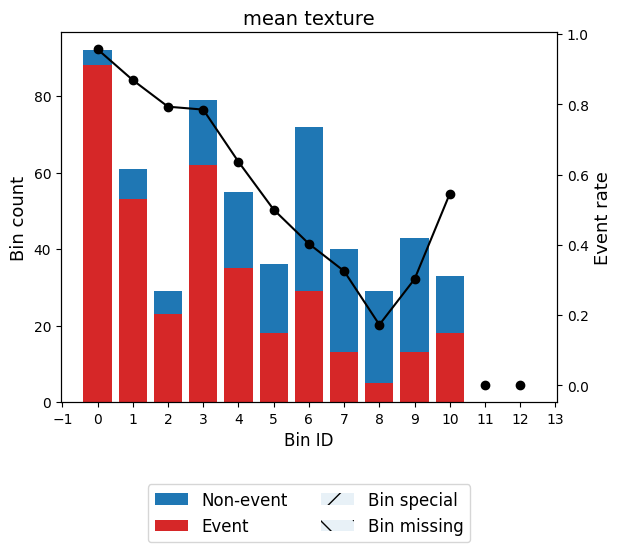

In [ ]:
binning_table.plot(metric="event_rate")


可以强迫变量mean texture与breast cancer概率呈现单调递减关系

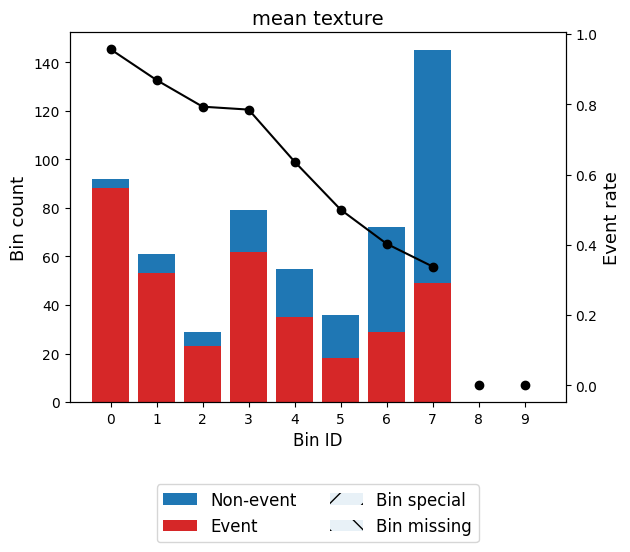

In [ ]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", monotonic_trend="descending")
optb.fit(x, y)


binning_table = optb.binning_table
binning_table.build()
binning_table.plot(metric="event_rate")

在 `optbinning` 库的使用中，`monotonic_trend` 选项提供了一个强大的特性，它允许用户对事件率（Event Rate）曲线或权重证据（WoE）曲线强制实施单调趋势。这对于确保分箱结果符合预期的业务理解和逻辑约束特别有用。

### 单调趋势（Monotonic Trend）选项

- **auto**（默认）：`optbinning` 使用基于机器学习的分类器来决定最可能最大化信息价值（IV）的单调趋势。它将从以下几种趋势中选择：“ascending”（上升）、“descending”（下降）、“peak”（峰值）、“valley”（谷值）。
- **ascending**：强制事件率或WoE随着分箱增加而单调递增。
- **descending**：强制事件率或WoE随着分箱增加而单调递减。
- **peak**：强制事件率或WoE曲线呈现单峰形状，即先增后减。
- **valley**：强制事件率或WoE曲线呈现谷形形状，即先减后增。

### 应用场景

在实际应用中，某些业务逻辑可能要求特征与目标变量之间的关联呈现特定的单调性。例如：

- 在信用评分模型中，我们可能预期借款人的信用评分随收入的增加而单调递增，因此可以应用“ascending”趋势。
- 相反，如果考虑借款人的负债比率，我们可能希望这个特征与目标变量（如违约概率）呈单调递减关系，此时应选择“descending”。

### 使用示例

以下展示了如何在 `OptimalBinning` 初始化时设置 `monotonic_trend` 选项：

```python
from optbinning import OptimalBinning

# 假设对某个特征进行分箱，并期待它与目标变量之间有单调上升的关系
optb = OptimalBinning(name='feature_name', dtype='numerical', solver='cp', monotonic_trend='ascending')

# 使用fit方法拟合数据
optb.fit(x, y)

# 查看分箱结果
print(optb.binning_table)
```

### 注意事项

- 虽然强制单调趋势可以满足特定的业务需求，但这也可能限制模型探索其他潜在的最优解。因此，默认“auto”选项尝试提供一个平衡点，既考虑到信息价值的最大化也考虑到单调性的约束。
- 在使用非“auto”选项时，务必确保所选的单调趋势与业务逻辑和数据现实相符，避免因不符合实际的强制趋势而导致模型性能下降。

通过合理利用 `monotonic_trend` 选项，可以在保证业务逻辑合理性、可解释性的同时，优化模型的预测性能。

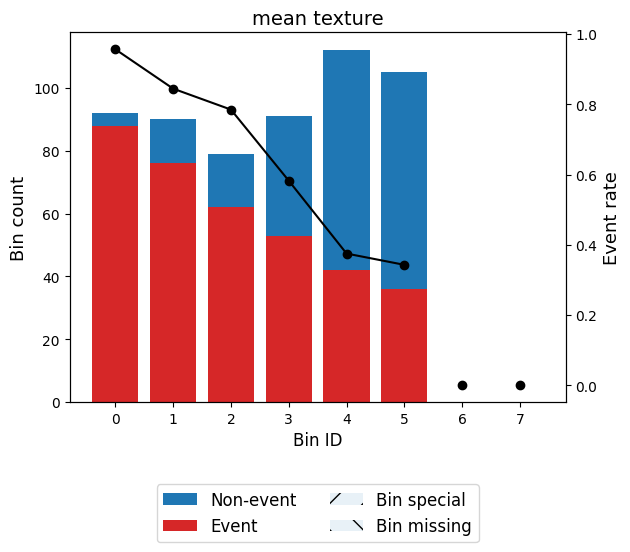

In [ ]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", monotonic_trend="descending", gamma=0.5)
optb.fit(x, y)


binning_table = optb.binning_table
binning_table.build()
binning_table.plot(metric="event_rate")

在 `optbinning` 库的版本 0.3.0 中，引入了一个新的约束，目的是通过减少支配性分箱（dominating bins）的影响，来产生更均匀一致的解决方案。这是通过降低最大分箱与最小分箱之间差异的集中度指标来实现的。具体来说，新的正则化参数 `gamma` 用于控制减少项的重要性：更大的 `gamma` 值意味着应用更强的正则化。

### 正则化参数 `gamma`

- **gamma** 控制着分箱过程中对分箱大小差异的惩罚力度。当 `gamma` 较高时，算法会倾向于生成分箱大小更加均衡的解决方案，减少某些分箱数量远大于其他分箱的情况。
- 通过调整 `gamma`，用户可以在确保分箱效果的同时，避免某个或某些分箱过于“支配”，从而可能导致模型对这些分箱过度敏感的问题。

### 为什么要减少支配性分箱？

在某些情况下，分箱结果可能会出现一个或几个分箱包含大部分数据，而其他分箱的数据量极少。这种情况可能导致：

1. **模型过拟合**：模型可能会对占支配地位的分箱过度敏感，捕捉到这些分箱中的噪声或偶然数据特征，而不是泛化的趋势。
2. **信息丢失**：小的分箱可能无法为模型提供足够的信息，特别是当这些分箱的数据点较少时，其统计意义可能不够显著。
3. **不公平的特征重要性**：支配性分箱可能会对模型的预测结果产生更大的影响，这可能导致对某些特征的重要性评估不够公平或准确。

### 如何使用 `gamma` 参数

在 `OptimalBinning` 对象的初始化时，可以通过设置 `gamma` 参数来控制这种正则化的程度。以下是一个使用示例：

```python
from optbinning import OptimalBinning

# 对某个特征进行分箱，同时限制支配性分箱的影响
optb = OptimalBinning(name='feature_name', dtype='numerical', solver='cp', gamma=5.0)

# 使用fit方法拟合数据
optb.fit(x, y)

# 查看分箱结果
print(optb.binning_table)
```

在这个例子中，`gamma=5.0` 表示对分箱大小差异施加强烈的惩罚，促使算法生成更均匀的分箱结果。

### 注意事项

- 调整 `gamma` 参数时，需要平衡模型的预测性能和分箱结果的均匀性。一个较高的 `gamma` 值可能会导致模型牺牲一定的预测准确性，以获得更加均匀的分箱分布。
- 最佳的控制程度往往需要通过交叉验证和网格搜索等技术，根据具体的数据集和应用场景来确定。

通过这种方式，`optbinning` 提供了强大的工具来精细控制分箱的过程，以符合具体业务需求和数据科学目标。

In [ ]:
user_splits = [  14,    15,    16,    17,    20,    21,    22,    27]
user_splits_fixed = [False, True,  True, False, False, False, False, False]


optb = OptimalBinning(name=variable, dtype="numerical", solver="mip", user_splits=user_splits, user_splits_fixed=user_splits_fixed)

optb.fit(x, y)


OptimalBinning(name='mean texture', solver='mip',
               user_splits=[14, 15, 16, 17, 20, 21, 22, 27],
               user_splits_fixed=array([False,  True,  True, False, False, False, False, False]))

In [ ]:
binning_table = optb.binning_table
binning_table.build()

optb.information()


optbinning (Version 0.20.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Name    : mean texture                    
  Status  : OPTIMAL                         

  Pre-binning statistics
    Number of pre-bins                     9
    Number of refinements                  0

  Solver statistics
    Type                                 mip
    Number of variables                  137
    Number of constraints                 55
    Objective value                   1.2423
    Best objective bound              1.2423

  Timing
    Total time                          0.04 sec
    Pre-processing                      0.00 sec   (  0.64%)
    Pre-binning                         0.00 sec   (  2.36%)
    Solver                              0.03 sec   ( 94.30%)
    Post-processing                     0.00 sec   (  0.36%)



In [ ]:
user_splits = np.array([
               ['Businessman'],
               ['Working'],
               ['Commercial associate'],
               ['Pensioner', 'Maternity leave'],
               ['State servant'],
               ['Unemployed', 'Student']], dtype=object)



optb = OptimalBinning(name=variable_cat, dtype="categorical", solver="cp",
                      user_splits=user_splits,
                      user_splits_fixed=[False, True, True, True, True, True])

optb.fit(x_cat, y_cat)

OptimalBinning(dtype='categorical', name='NAME_INCOME_TYPE',
               user_splits=array([list(['Working']), list(['Commercial associate']),
       list(['Pensioner', 'Maternity leave']), list(['State servant']),
       list(['Unemployed', 'Student'])], dtype=object),
               user_splits_fixed=array([ True,  True,  True,  True,  True]))

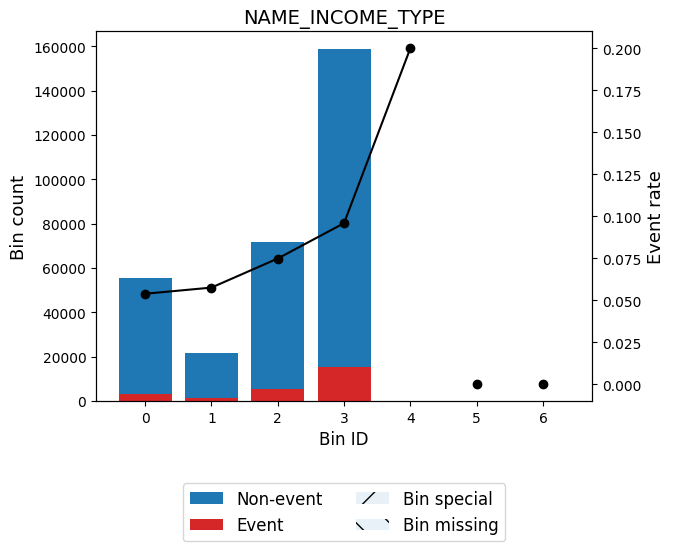

optbinning (Version 0.20.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Name    : NAME_INCOME_TYPE                
  Status  : OPTIMAL                         

  Pre-binning statistics
    Number of pre-bins                     5
    Number of refinements                  1

  Solver statistics
    Type                                  cp
    Number of booleans                     0
    Number of branches                     0
    Number of conflicts                    0
    Objective value                    57843
    Best objective bound               57843

  Timing
    Total time                          0.22 sec
    Pre-processing                      0.02 sec   (  9.84%)
    Pre-binning                         0.19 sec   ( 86.60%)
    Solver                              0.01 sec   (  3.40%)
      model generation                  0.00 sec   ( 64.06%)
      optimizer                         0.00 sec   ( 35.94%)
    Post-processing                     0

In [ ]:
binning_table = optb.binning_table
binning_table.build()

optb.binning_table.plot(metric="event_rate")


optb.information()

在某些情况下，用户可能已经根据先验知识、业务需求或特定约束定义了分箱的分界点（split points）或分箱（bins）。`optbinning` 库的 `OptimalBinning` 类允许用户为数值型变量指定自定义的分界点，以及为分类变量指定自定义的 bins。这些自定义的设置会被用作预分箱策略，从而覆盖用户设置的任何预分箱方法。

自版本 0.5.0 起，`optbinning` 引入了 `user_splits_fixed` 参数。这个参数允许用户固定一些自定义的分界点，确保这些分界点一定会出现在最终的分箱解决方案中。

### 用户自定义分界点或分箱

- **数值型变量**：用户可以为数值型特征指定自定义的分界点。这些分界点定义了如何划分数据的区间。
- **分类变量**：对于分类特征，用户可以直接指定分箱，即定义哪些类别应该组合在一起形成新的分类。

### `user_splits_fixed` 参数

- **功能**：`user_splits_fixed` 参数允许用户指定一些必须保留在最终分箱解决方案中的分界点。这为需要严格遵循某些业务规则或知识约束的场景提供了灵活性。
- **用途**：在需要固定某些分界点不变，同时优化其他分界点以提升模型性能的情况下，这个参数尤其有用。

### 如何使用用户自定义分界点

以下展示了如何在初始化 `OptimalBinning` 时设置用户自定义的分界点或固定某些分界点：

```python
from optbinning import OptimalBinning

# 假设对某个数值型特征进行分箱，用户自定义分界点
user_splits = [10, 20, 30]  # 示例分界点

# 初始化 OptimalBinning，设置用户自定义分界点
# 假设我们希望固定第一个和最后一个分界点
user_splits_fixed = [True, False, True]  # 固定第一个和最后一个分界点

optb = OptimalBinning(
    name='feature_name',
    dtype='numerical',
    solver='cp',
    user_splits=user_splits,     # 设置自定义分界点
    user_splits_fixed=user_splits_fixed  # 设置固定的分界点
)

# 使用fit方法拟合数据
optb.fit(x, y)

# 查看分箱结果
print(optb.binning_table)
```

### 注意事项

- 当使用 `user_splits` 和 `user_splits_fixed` 时，需要仔细考虑这些设置是否符合数据的实际分布和业务逻辑，以避免因为过度约束而降低模型性能。
- 自定义分界点和固定分界点的功能提供了极大的灵活性，但也意味着需要用户承担确保这些设置合理性的责任。

通过这种方式，`optbinning` 提供了强大的工具来满足具体业务需求和数据科学目标，允许在自动化分箱过程中融入专业知识和约束。

在 `optbinning` 库中，选择合适的求解器（solver）对于优化分箱过程的性能和效率至关重要，特别是当处理不同规模的问题时。`optbinning` 提供了几种求解器选项，包括 "cp"（Constraint Programming求解器），"mip"（Mixed-Integer Linear Programming求解器），以及 "ls"（LocalSolver，一个商业求解器）。选择合适的求解器取决于多个因素，如问题的规模、可接受的求解时间以及是否需要商业级优化能力。

### 求解器选择指南

1. **对于小规模问题**（例如，`max_n_prebins` <= 20）:
   - 通常，"mip" 求解器比 "cp" 求解器更快。这种情况适用于数据集较小，分箱数量有限的情形，"mip" 能较快地找到较优解。

2. **对于中等和较大规模的问题**:
   - 实验显示，"cp" 求解器在这些问题上表现得比 "mip" 更好。当 `max_n_prebins` 较大时，"cp" 求解器在求解时间和解决方案质量方面往往更有优势。

3. **对于非常大的问题**:
   - 推荐使用商业求解器 LocalSolver，通过设置 `solver="ls"` 来调用。LocalSolver 针对大规模问题进行了优化，能够处理更复杂的分箱情况，并提供高效的解决方案。

### 使用 LocalSolver 的注意事项

- **商业授权**：LocalSolver 是一个商业产品，需要适当的授权才能使用。在考虑使用 LocalSolver 时，请确保你了解相关的授权和成本。
- **性能优势**：LocalSolver 被设计来处理非常大的优化问题，并提供了一系列的优势，如求解速度更快、解决方案更佳等。对于复杂和高维度的分箱问题，使用 LocalSolver 可能会带来明显的性能提升。

### 示例

以下展示了如何在 `OptimalBinning` 初始化时选择不同的求解器：

```python
from optbinning import OptimalBinning

# 对于小规模问题
optb_small = OptimalBinning(name='feature_name', dtype='numerical', solver='mip')

# 对于中等和大规模问题
optb_medium = OptimalBinning(name='feature_name', dtype='numerical', solver='cp')

# 对于非常大的问题，使用LocalSolver
optb_large = OptimalBinning(name='feature_name', dtype='numerical', solver='ls')
```

### 结论

选择合适的求解器对于在合理的时间内获得高效和可靠的分箱解决方案至关重要。`optbinning` 通过提供多种求解器选项，确保了在不同场景和问题规模下都能保持高效性能。在实际应用中，建议根据问题的具体需求和规模进行求解器的选择和测试。对于大规模和复杂问题，LocalSolver 作为一个强大的商业选项，值得考虑和投资。

In [ ]:
!wget https://raw.githubusercontent.com/benoitparis/explainable-challenge/refs/heads/master/heloc_dataset_v1.csv

--2024-11-03 09:42:45--  https://raw.githubusercontent.com/benoitparis/explainable-challenge/refs/heads/master/heloc_dataset_v1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 678479 (663K) [text/plain]
Saving to: ‘heloc_dataset_v1.csv.1’

heloc_dataset_v1.cs 100%[===================>] 662.58K  --.-KB/s    in 0.07s   

2024-11-03 09:42:46 (9.73 MB/s) - ‘heloc_dataset_v1.csv.1’ saved [678479/678479]



In [ ]:
df = pd.read_csv("heloc_dataset_v1.csv", sep=",")

The data dictionary of this challenge includes three special values/codes:

-9 No Bureau Record or No Investigation

-8 No Usable/Valid Trades or Inquiries

-7 Condition not Met (e.g. No Inquiries, No Delinquencies)

In [ ]:
df.head(50)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,3,5,23,1,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,0,8,7,0,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,7,8,9,4,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,6,6,30,3,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,7,8,12,0,25,0,1,1,51,89,3,1,0,80
5,Bad,59,137,11,78,31,0,0,91,1,4,6,32,1,47,0,0,0,62,93,12,4,3,94
6,Good,54,88,7,37,25,0,0,92,9,4,6,26,3,58,0,4,4,89,76,7,7,2,100
7,Good,68,148,7,65,17,0,0,83,31,6,6,18,1,44,0,0,0,28,48,2,2,2,40
8,Bad,59,324,2,138,24,0,0,85,5,4,6,27,1,26,0,1,1,68,-8,7,1,3,90
9,Bad,61,79,4,36,19,0,0,95,5,4,6,19,3,26,0,6,6,31,86,5,3,1,62


In [ ]:
df.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,5.510183,20.856965,1.253083,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,3.971182,14.580905,3.068684,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,5.000000,12.000000,0.000000,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,6.000000,20.000000,1.000000,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,8.000000,29.000000,3.000000,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,8.000000,104.000000,19.000000,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


In [ ]:
special_codes = [-9, -8, -7]


variable = "AverageMInFile"
x = df[variable].values
y = df.RiskPerformance.values


df.RiskPerformance.unique()

array(['Bad', 'Good'], dtype=object)

In [ ]:
mask = y == "Bad"
y[mask] = 1
y[~mask] = 0
y = y.astype(int)

In [ ]:
idx = np.random.randint(0, len(x), 500)
x = x.astype(float)
x[idx] = np.nan


In [ ]:

optb = OptimalBinning(name=variable, dtype="numerical", solver="mip", special_codes=special_codes)

optb.fit(x, y)

OptimalBinning(name='AverageMInFile', solver='mip', special_codes=[-9, -8, -7])

In [ ]:
optb.information(print_level=1)

optbinning (Version 0.20.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Name    : AverageMInFile                  
  Status  : OPTIMAL                         

  Pre-binning statistics
    Number of pre-bins                    14
    Number of refinements                  0

  Solver statistics
    Type                                 mip
    Number of variables                  202
    Number of constraints                105
    Objective value                   0.3263
    Best objective bound              0.3263

  Timing
    Total time                          0.06 sec
    Pre-processing                      0.00 sec   (  7.00%)
    Pre-binning                         0.01 sec   ( 11.00%)
    Solver                              0.05 sec   ( 81.01%)
    Post-processing                     0.00 sec   (  0.26%)



In [ ]:
binning_table = optb.binning_table
binning_table.build()


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 30.50)",552,0.052778,98,454,0.822464,-1.445302,0.091871,0.010578
1,"[30.50, 48.50)",1053,0.100679,291,762,0.723647,-0.874796,0.071196,0.008626
2,"[48.50, 54.50)",534,0.051057,187,347,0.649813,-0.530388,0.013877,0.001715
3,"[54.50, 60.50)",591,0.056506,234,357,0.604061,-0.334587,0.006222,0.000774
4,"[60.50, 65.50)",611,0.058419,267,344,0.563011,-0.165565,0.001592,0.000199
5,"[65.50, 70.50)",657,0.062817,300,357,0.543379,-0.086126,0.000465,0.000058
6,"[70.50, 74.50)",533,0.050961,263,270,0.506567,0.06156,0.000193,0.000024
7,"[74.50, 81.50)",909,0.086911,477,432,0.475248,0.186919,0.003040,0.000379
8,"[81.50, 97.50)",1704,0.162922,965,739,0.433685,0.354658,0.020438,0.002541
9,"[97.50, 116.50)",1173,0.112152,725,448,0.381927,0.569206,0.035822,0.004418


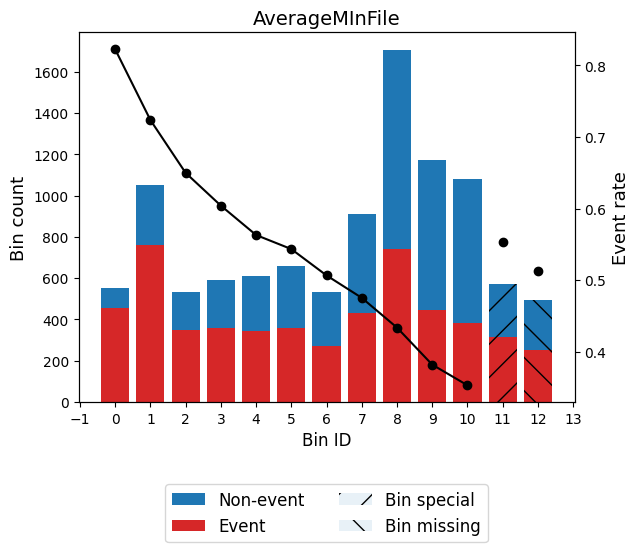

In [ ]:

binning_table.plot(metric="event_rate")

10桶对应特殊bin

11桶对应缺失bin

In [ ]:
special_codes = {'special_1': -9, "special_2": -8, "special_3": -7}

x[10:20] = -8
x[100:105] = -7

optb = OptimalBinning(name=variable, dtype="numerical", solver="mip", special_codes=special_codes)

optb.fit(x, y)


OptimalBinning(name='AverageMInFile', solver='mip',
               special_codes={'special_1': -9, 'special_2': -8,
                              'special_3': -7})

In [ ]:

optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 30.50)",551,0.052682,98,453,0.822142,-1.443097,0.091467,0.010534
1,"[30.50, 48.50)",1051,0.100488,290,761,0.724072,-0.876925,0.071384,0.008648
2,"[48.50, 56.50)",695,0.066450,246,449,0.646043,-0.513864,0.016983,0.002100
3,"[56.50, 64.50)",909,0.086911,383,526,0.578658,-0.229439,0.004532,0.000565
4,"[64.50, 70.50)",786,0.075151,359,427,0.543257,-0.085634,0.000550,0.000069
5,"[70.50, 74.50)",533,0.050961,263,270,0.506567,0.06156,0.000193,0.000024
6,"[74.50, 81.50)",907,0.086720,477,430,0.474090,0.191559,0.003186,0.000398
7,"[81.50, 97.50)",1700,0.162539,963,737,0.433529,0.355293,0.020463,0.002544
8,"[97.50, 116.50)",1173,0.112152,725,448,0.381927,0.569206,0.035822,0.004418
9,"[116.50, inf)",1077,0.102974,697,380,0.352832,0.694442,0.048465,0.005939


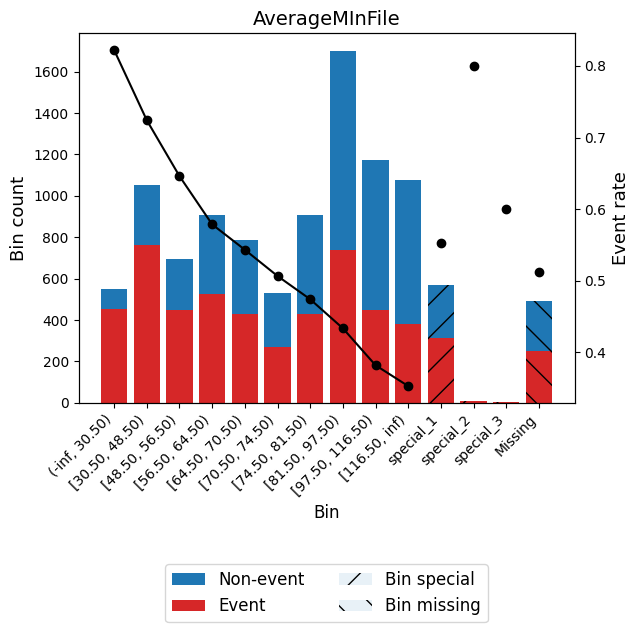

In [ ]:
optb.binning_table.plot(metric="event_rate", show_bin_labels=True)

在 `optbinning` 库的版本 0.13.0 中，引入了一个新功能，允许用户通过传入一个特殊代码的字典来单独处理这些特殊代码。这种灵活性对于数据科学家和分析师来说尤其有价值，因为它使得分箱过程可以更加精细地控制和适应数据的特定情况，如缺失值、异常值或需要特别处理的其他标记值。

### 特殊代码的处理

- **特殊代码**：这些可以是数据中的特定值或值集合，代表如缺失数据、未知类别、异常值或其他需要单独处理的条件。
- **字典传入**：通过一个字典来指定哪些值或值的列表应该被视为特殊代码，这样 `optbinning` 就会在进行分箱处理时单独考虑这些值。

### 如何使用特殊代码选项

在 `OptimalBinning` 或 `OptimalBinningClassifier` 初始化时，可以设置 `special_codes` 参数为一个字典。这个字典的键表示特殊代码的类型（你可以自定义类型名称），而值则是特殊代码的集合（可以是一个单独的值或者值的列表）。

```python
from optbinning import OptimalBinning

# 定义特殊代码
special_codes = {
    "missing": [-1],
    "unknown": [999],
    "outliers": [-999, -999.5, -999.9]
}

# 使用 special_codes 参数
optb = OptimalBinning(
    name='feature_name',
    dtype='numerical',
    solver='cp',
    special_codes=special_codes
)

# 使用fit方法拟合数据
optb.fit(x, y)

# 查看分箱结果
print(optb.binning_table)
```

### 特殊代码处理的优点

1. **精确控制**：允许用户对特殊情况有更精确的控制和处理，如单独处理缺失值、异常值等。
2. **提高模型性能**：通过合理处理特殊代码，可以避免这些特殊值对分箱结果和最终模型性能产生负面影响。
3. **增强可解释性**：明确地处理这些特殊情况也能增强模型的可解释性，使得模型的分箱逻辑更清晰。

### 注意事项

- **合理定义特殊代码**：需要根据数据的实际情况和业务理解来定义哪些值应该被视为特殊代码。
- **特殊代码的影响**：考虑特殊代码如何影响分箱结果和模型性能，确保这些处理逻辑符合业务目标和数据科学模型的需求。

通过版本 0.13.0 引入的这一特性，`optbinning` 进一步提升了其在处理复杂数据情况下的能力，使得数据预处理和特征工程过程更加灵活和高效。

In [ ]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="mip", verbose=True)
optb.fit(x, y)


2024-11-03 09:42:47,777 | INFO : Optimal binning started.
2024-11-03 09:42:47,783 | INFO : Options: check parameters.
2024-11-03 09:42:47,786 | INFO : Pre-processing started.
2024-11-03 09:42:47,789 | INFO : Pre-processing: number of samples: 10459
2024-11-03 09:42:47,793 | INFO : Pre-processing: number of clean samples: 9967
2024-11-03 09:42:47,796 | INFO : Pre-processing: number of missing samples: 492
2024-11-03 09:42:47,797 | INFO : Pre-processing: number of special samples: 0
2024-11-03 09:42:47,801 | INFO : Pre-processing terminated. Time: 0.0004s
2024-11-03 09:42:47,802 | INFO : Pre-binning started.
2024-11-03 09:42:47,820 | INFO : Pre-binning: number of prebins: 14
2024-11-03 09:42:47,823 | INFO : Pre-binning: number of refinements: 0
2024-11-03 09:42:47,825 | INFO : Pre-binning terminated. Time: 0.0140s
2024-11-03 09:42:47,827 | INFO : Optimizer started.
2024-11-03 09:42:47,834 | INFO : Optimizer: classifier predicts descending monotonic trend.
2024-11-03 09:42:47,836 | INFO :

OptimalBinning(name='AverageMInFile', solver='mip', verbose=True)

在 `optbinning` 库的使用过程中，`verbose`（详细）选项提供了一种机制，用于在分箱计算的各个步骤中输出详细的日志信息。这对于调试（debugging）目的特别有用，可以帮助开发者和数据科学家深入了解分箱过程中每个阶段的具体执行情况，从而确保分箱逻辑和结果符合预期。

### 如何使用 `verbose` 选项

`verbose` 选项可以在初始化 `OptimalBinning` 或 `OptimalBinningClassifier` 对象时设置。它通常接受一个整数，指示输出日志的详细级别。例如：

- `verbose=0`：静默模式，不输出调试信息。
- `verbose=1`：输出关键的执行信息。
- `verbose>1`：输出更详细的调试信息，级别越高，输出的信息越详细。

以下是一个使用示例：

```python
from optbinning import OptimalBinning

# 初始化 OptimalBinning 对象，设置 verbose 为 2
optb = OptimalBinning(
    name='feature_name',
    dtype='numerical',
    solver='cp',
    verbose=2  # 设置详细级别
)

# 使用fit方法拟合数据
optb.fit(x, y)

# 查看分箱结果
print(optb.binning_table)
```

### 输出信息的内容

开启 `verbose` 选项后，你可能会看到如下类型的输出：

- 初始化信息和参数确认。
- 分箱过程中关键步骤的执行信息，如预分箱方法的执行情况、优化过程的中间结果等。
- 如果应用了特殊代码处理，可能会包括这些代码如何被处理的详细信息。
- 计算过程中的警告或错误信息。

### 注意事项

- **性能影响**：在生产环境中，建议关闭或降低 `verbose` 级别，以避免不必要的性能开销。
- **信息解读**：输出的详细信息需要一定的专业知识来解读，特别是对于优化过程和算法内部的细节。

通过设置 `verbose` 选项，`optbinning` 使得分箱过程的调试和监控变得更加透明和可控，有助于提升数据预处理阶段的效率和效果。